# US15

### Introdução:
...
___

### Código e Resultados:

Correlação: 0.9483427129818052


C:\Users\samar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


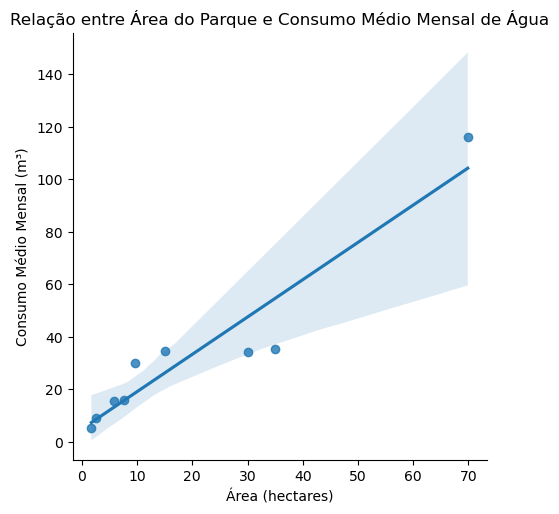

Intercepto: 4.916846246295698
Coeficiente: 1.4204286568566842
Consumo Médio Mensal Prevendo para 55 hectares: 83.04042237341332 m³
Custo Médio Mensal Previsto para 55 hectares: 83.04042237341332 unidades monetárias


C:\Users\samar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:

from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar os dados de consumo de água
water_data = pd.read_csv('../datasetsMATCP/water_consumption_updated.csv', delimiter=';', decimal=',')

# Carregar os dados de área dos parques
area_data = pd.read_csv('../datasetsMATCP/Area.csv', delimiter=';', decimal=',')

# Converter a data para o formato datetime
water_data['Date'] = pd.to_datetime(water_data[['Year', 'Month', 'Day']])

# Calcular o consumo mensal médio
monthly_consumption = water_data.groupby(['Park', water_data['Date'].dt.to_period('M')])['Consumption'].mean().reset_index()

# Calcular a média mensal por parque
average_monthly_consumption = monthly_consumption.groupby('Park')['Consumption'].mean().reset_index()
average_monthly_consumption.columns = ['Park', 'AverageMonthlyConsumption']

# Combinar os dados de consumo médio mensal com os dados de área
data = pd.merge(average_monthly_consumption, area_data, on='Park')
data.columns = ['Park', 'AverageMonthlyConsumption', 'Area']


# Verificar a correlação
correlation, _ = pearsonr(data['Area'], data['AverageMonthlyConsumption'])
print(f'Correlação: {correlation}')

# Plotar a relação entre área e consumo médio mensal
sns.lmplot(x='Area', y='AverageMonthlyConsumption', data=data)
plt.xlabel('Área (hectares)')
plt.ylabel('Consumo Médio Mensal (m³)')
plt.title('Relação entre Área do Parque e Consumo Médio Mensal de Água')
plt.show()

# Ajustar o modelo de regressão linear
X = data[['Area']]
y = data['AverageMonthlyConsumption']
model = LinearRegression()
model.fit(X, y)

# Coeficientes do modelo
print(f'Intercepto: {model.intercept_}')
print(f'Coeficiente: {model.coef_[0]}')

# Prever o consumo médio mensal para um parque de 55 hectares
new_park_area = [[55]]
predicted_consumption = model.predict(new_park_area)
print(f'Consumo Médio Mensal Prevendo para 55 hectares: {predicted_consumption[0]} m³')

# Suponha que o custo por m³ de água seja constante, por exemplo, 1 unidade monetária por m³
cost_per_m3 = 1  # Isto deve ser ajustado conforme as regras do US09
predicted_cost = predicted_consumption[0] * cost_per_m3
print(f'Custo Médio Mensal Previsto para 55 hectares: {predicted_cost} unidades monetárias')


### Análise e interpretação dos resultados:
...

### Fórmulas Usadas:

...


---

# US16

### Introdução:
...
___

### Código e Resultados:

O melhor ajuste é um polinômio de grau 5


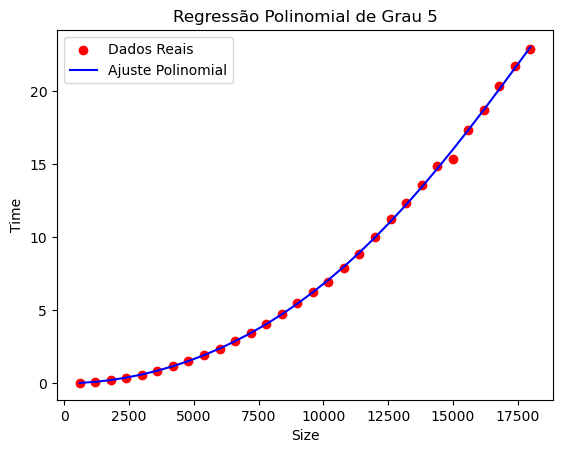

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
data = pd.read_csv('../datasetsMATCP/solution_us14.csv', delimiter=';')
data['time'] = data['time'].str.replace(',', '.').astype(float)

sizes = data['size'].values
times = data['time'].values

# Transformar os dados para uma forma adequada à regressão polinomial
sizes = sizes.reshape(-1, 1)

# Listas para armazenar erros e modelos
errors = []
models = []

# Testar polinômios de grau 1 a 5
for degree in range(1, 6):
    poly = PolynomialFeatures(degree)
    sizes_poly = poly.fit_transform(sizes)

    model = LinearRegression()
    model.fit(sizes_poly, times)

    times_pred = model.predict(sizes_poly)
    error = mean_squared_error(times, times_pred)

    errors.append(error)
    models.append((degree, model, poly))

# Encontrar o modelo com menor erro
best_degree, best_model, best_poly = sorted(zip(errors, models))[0][1]

print(f"O melhor ajuste é um polinômio de grau {best_degree}")

# Prever os tempos usando o melhor modelo
sizes_poly_best = best_poly.fit_transform(sizes)
times_pred_best = best_model.predict(sizes_poly_best)

# Plotar os resultados
plt.scatter(sizes, times, color='red', label='Dados Reais')
plt.plot(sizes, times_pred_best, color='blue', label='Ajuste Polinomial')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title(f'Regressão Polinomial de Grau {best_degree}')
plt.legend()
plt.show() 


### Análise e interpretação dos resultados:
...

### Fórmulas Usadas:

...


---